In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib widget

import cartopy.crs as ccrs

import sys
sys.path.append('../')

from ERA import ERA_Fields_New as ef

In this environment you cannot import Basemap
In this environment you cannot import Basemap


In [2]:
#tas = ef.Plasim_Field('tas', 'tas.nc', label='2m temperature', Model='Plasim', mylocal='../../EW2-heatwaves/data/') # on MAC
tas = ef.Plasim_Field('tas', 'Data_Plasim_LONG/ANO_LONG_tas.nc', label='2m temperature', Model='Plasim',)

The loaded field has 8000 years, not 1000 as provided. Setting self.years = 8000


In [3]:
tas.select_years(list(np.arange(10)))

In [5]:
tas.set_mask('France')

In [15]:
tas.filter()

In [6]:
tas.select_lonlat(lat_end = 22, lon_start=64, lon_end=64)

In [9]:
tas.field.shape

(1500, 22, 128)

In [19]:
np.sum(tas.mask)

<xarray.DataArray 'lsm' ()>
array(16)

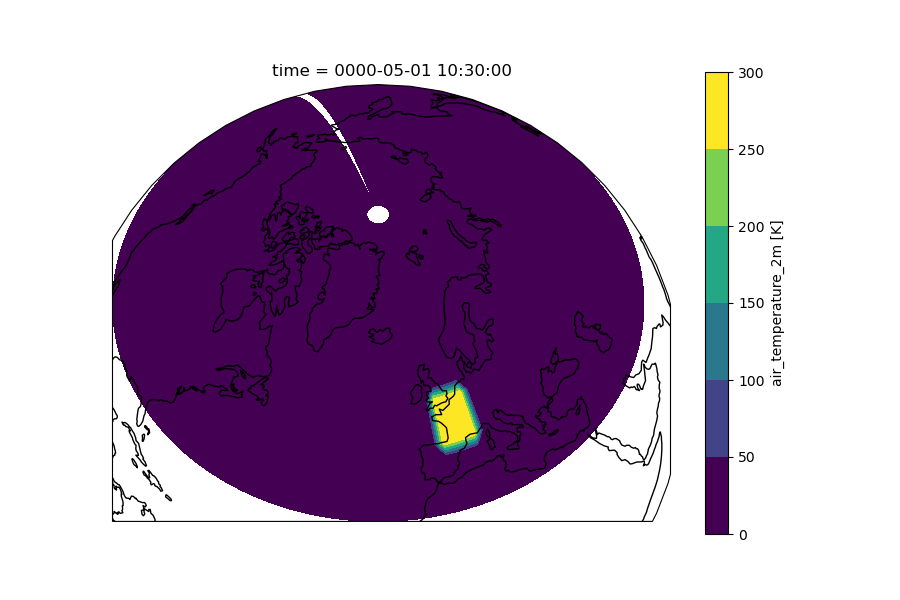

In [16]:
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(projection=ccrs.Orthographic(-20, 55))
ef.monotonize_longitude(tas.field).isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
# ax.set_extent([-15, 15, 35, 60])

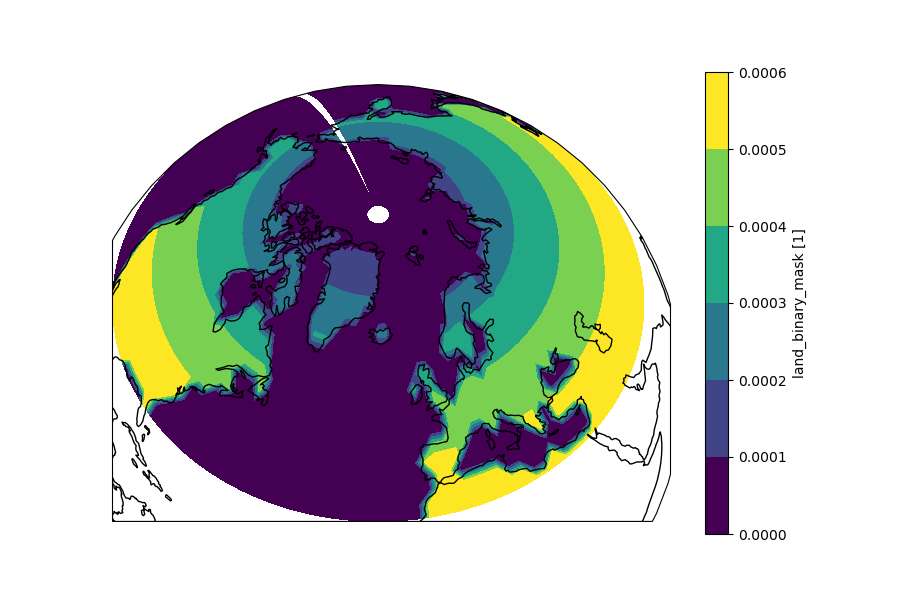

In [20]:
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(projection=ccrs.Orthographic(-20, 55))
ef.monotonize_longitude(tas.land_area_weights).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

In [26]:
tas.area_integral.time.dt.dayofyear

<xarray.DataArray 'dayofyear' (time: 1500)>
array([121, 122, 123, ..., 268, 269, 270])
Coordinates:
  * time     (time) object 0000-05-01 10:30:00 ... 0009-09-30 10:30:00

In [34]:
tas.field.time.dt.dayofyear[0]

<xarray.DataArray 'dayofyear' ()>
array(121)
Coordinates:
    time     object 0000-05-01 10:30:00

In [33]:
np.arange(10).reshape((5,2)).flatten()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
field = tas
time_start = 30
time_end = 120
T = 14
percent = 10
threshold = None

day0 = field.field.time.dt.dayofyear[0]
A = field.compute_time_average(day_start=day0+time_start, day_end=day0+time_end, T=T)
labels, threshold = ef.is_over_threshold(field.to_numpy(A), threshold=threshold, percent=percent)

In [10]:
field.area_integral

<xarray.DataArray (time: 1500)>
array([281.57407, 281.77982, 284.55576, ..., 290.49448, 290.84033,
       291.51178], dtype=float32)
Coordinates:
  * time     (time) object 0000-05-01 10:30:00 ... 0009-09-30 10:30:00

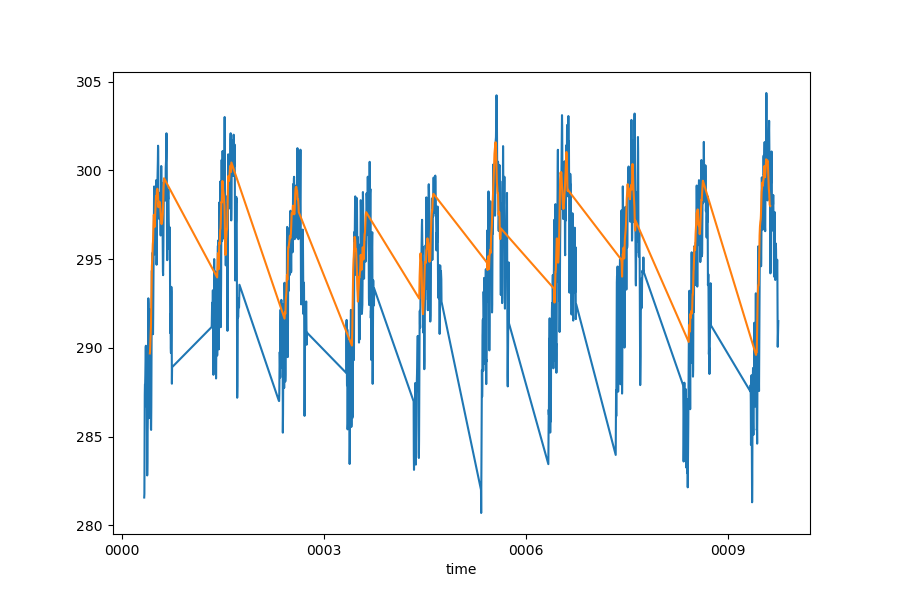

In [13]:
fig,ax = plt.subplots(figsize=(9,6))

field.area_integral.plot.line(ax = ax)
A.plot.line(ax = ax)


In [17]:
field.var.shape

(10, 150, 22, 128)

In [2]:
tas = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_tas.nc')['tas']

In [3]:
tas_ds

<xarray.Dataset>
Dimensions:    (time: 1200000, bnds: 2, lon: 128, lat: 64)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-09-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    tas        (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Fri Oct 01 20:31:36 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [4]:
tas = tas_ds['tas']